In [29]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import decomposition
from functions import *
from sklearn import metrics
from statsmodels.stats.diagnostic import het_white , normal_ad
from sklearn.metrics import  accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
billet = pd.read_csv("billets.csv", sep= ';')
prod_test = pd.read_csv("billets_production.csv")
prod_test = prod_test.set_index("id")

# Nettoyage des données;

In [30]:
billet.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [31]:
billet.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [32]:
billet.head(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


# Régression lineaire pour predir les valeur manquantes;

In [33]:
# Separation des donnees manquantes des donnees manquantes:
train = billet.dropna()
test = billet[billet.isnull().any(axis=1)]
# Creation de X_train et Y_train:
x_train = train.drop("margin_low", axis=1)
y_train = train["margin_low"]
# Regression lineaire:
model = LinearRegression()
model.fit(x_train, y_train)
print(" le score de notre modéle de régression est de:", (model.score(x_train, y_train)*100), "%")
# Predictions:
x_train = train[["is_genuine","diagonal","height_left","height_right", "margin_up", "length"]]
train["margin_low_pred"] = model.predict(x_train)
# Instanciation:
import statsmodels.formula.api as smf
reg_linb = smf.ols("margin_low ~ diagonal + height_left + height_right + margin_up + length", data = billet)
res_lin = reg_linb.fit()
res_lin.summary()

 le score de notre modéle de régression est de: 61.6876075567103 %


<ipython-input-33-b115f69c41c7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["margin_low_pred"] = model.predict(x_train)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Fri, 29 Apr 2022   Prob (F-statistic):          2.60e-202
Time:                        10:17:27   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382      0.017       4.055      41.935
diagonal        -0.1111      0.041     -2.680      0.007      -0.192      -0.030
height_left      0.1841      0.045      4.113      0.000       0.096       0.272
height_right     0.2571      0.043      5.978      0.000       0.173       0.342
margin_up        0.2562      0.064      3.980      0.000       0.130       0.382
length          -0.4091      0.018    -22.627      0.000      -0.445      -0.374
==============================================================================
Omnibus:                       73.627   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.862
Skew:                           0.482   Prob(JB):                     1.53e-21
Kurtosis:                       3.801   Cond. No.                     1.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Prob(F-Statistic): L'hypothèse nulle du test de Fisher est notre régression linaire est donné de mauvais résultat. Ici, elle est très faible et inférieure au seuil alpha 5 % (ou 1 %), on rejet l'hypothèse nulle, notre modèle est meilleur que celui où les coefficients seraient nuls.  

Le R² ajusté (puisque nous avons un grand nombre de valeurs) n'est pas satisfaisant. (inférieur à 0,5). C'est est la partie de la variation totale de la variable dépendante qui est expliquée par la variation de la variable indépendante.  

# Il y a plusieurs hypothèses à tester pour la régression linéaire :  

Multicollinéarité  

Linéarité 

Normalité 

Homocédasticité

In [34]:
# Multicollinearite:
vif= pd.Series([variance_inflation_factor(train[["diagonal","height_left","height_right", "margin_up", "length"]].values, i)
               for i in range(train[["diagonal","height_left","height_right", "margin_up", "length"]].shape[1])],
              index=train[["diagonal","height_left","height_right", "margin_up", "length"]].columns) # On enleve is genuine car c'est un bool 
print("VIF par features:\n", vif)
print("VIF moyen:",vif.mean())

VIF par features:
 diagonal        170566.670778
height_left     111895.309916
height_right    100858.864433
margin_up          261.969190
length           22708.222743
dtype: float64
VIF moyen: 81258.20741161003


on suppose que les prédicteurs utilisés dans la régression ne sont pas corrélés les uns aux autres. la collinéarité est élevée il semble qu'il y ai un problème de multicollinéarité. Le VIF indique effectivment une forte multicolinéarité.  

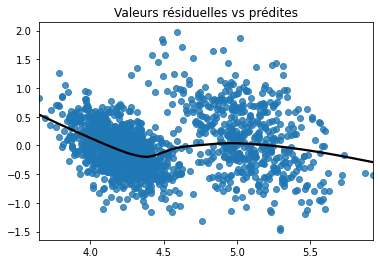

In [35]:
# Linearite:
def linearity_test(model, y):
    fitted_vals = model.predict()
    resids = model.resid
    sns.regplot(x=fitted_vals, y=resids, lowess=True, line_kws={'color': 'black'})
    plt.title("Valeurs résiduelles vs prédites")
linearity_test(res_lin, train["margin_low"])

La relation n'est pas linéaire, l'hypothèse de linéarité n'est pas vérifiée. Solutions potentielles :  

Transformation non-linéaire sur les variables dépendantes/indépendantes.  

Ajout d'une feature, transformation de features préexistantes (mise au carré par exemple).  

Ajout de features non considérées précédemment.  

<ipython-input-36-a3aec89c6232>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["residual"] = train["margin_low"] - train["margin_low_pred"]


La p-value du test d'Aderson-Darling vaux 3.9857722331535204e-05


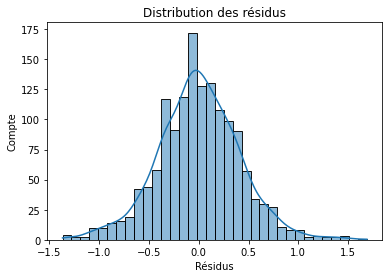

In [36]:
# test de normalité;

# Creation d'une colonne contenant les residus:
train["residual"] = train["margin_low"] - train["margin_low_pred"]

# Normalite:
print("La p-value du test d'Aderson-Darling vaux", normal_ad(train["residual"])[1])

# Graphique:
sns.histplot(train["residual"], kde=True)
plt.xlabel("Résidus")
plt.ylabel("Compte")
plt.title("Distribution des résidus")
plt.show()

Une p-value inférieure à alpha pour le test d'Anderson-Darling indique que l'hypothèse nulle de normalité de la distribution des résidus est rejetée.  

Ici, l'hypothèse est rejetée puisque la p-value obtenue est inférieure au seuil alpha 5 % (ou 1 %), les résidus suivent une distribution non Normale.

                0        1            2               3
0  Test Statistic  p-value  F-Statistic  F-Test p-value
1      109.860152      0.0     5.853731             0.0


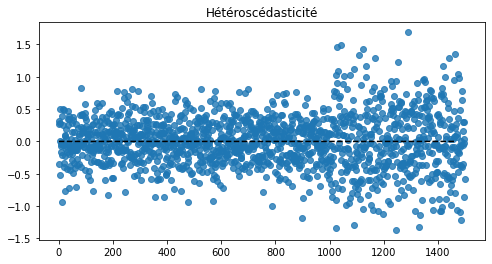

In [37]:
# hétéroscédasticité:
white_test = het_white(res_lin.resid, res_lin.model.exog)
labels_white_test = ["Test Statistic", "p-value", "F-Statistic", "F-Test p-value"] 
print(pd.DataFrame((labels_white_test, white_test)))

# Graphique:
plt.subplots(figsize=(8, 4))
plt.scatter(x=train.index, y=train["residual"], alpha=0.8)
plt.plot(np.repeat(0, len(train.index)+2), color="black", linestyle='--')
plt.title("Hétéroscédasticité")
plt.show()

La répartition semble aléatoire sur le graphique.  

L'hypothèse nulle du test de White est qu'il y a homoscédasticité, l'hypothèse alternative est qu'il y a hétéroscédasticité (les résidus sont dispersés aléatoirement, la variance d'un individu à un autre est constante).

La p-value est ici très inférieure au seuil, on rejet l'hypothèse nulle d'homoscédasticité. L'hypothèse d'homoscédasticité de notre régression linéaire est donc considérée comme rejété au risque alpha 5 % (ou 1 %).

# Application du model;

In [38]:
# Application du modele sur les donnees test
x_test = test[["is_genuine","diagonal","height_left","height_right", "margin_up","length"]]
test["margin_low"] = model.predict(x_test)
# Concatenation:
result = [test, train]
billet = pd.concat(result)
billet = billet.drop(["margin_low_pred", "residual"], axis=1)
billet.reset_index(drop=True)

<ipython-input-38-f6d24f69a1d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["margin_low"] = model.predict(x_test)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.94,103.89,103.45,4.064954,3.25,112.79
1,True,171.93,104.07,104.18,4.111990,3.14,113.08
2,True,172.07,103.80,104.38,4.134003,3.02,112.93
3,True,171.45,103.66,103.80,3.993571,3.62,113.27
4,True,171.83,104.14,104.06,4.140399,3.02,112.36
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.420000,3.09,111.28
1496,False,172.19,104.63,104.44,5.270000,3.37,110.97
1497,False,171.80,104.01,104.12,5.510000,3.36,111.95
1498,False,172.06,104.28,104.06,5.170000,3.46,112.25


# Analyse visuel des données;

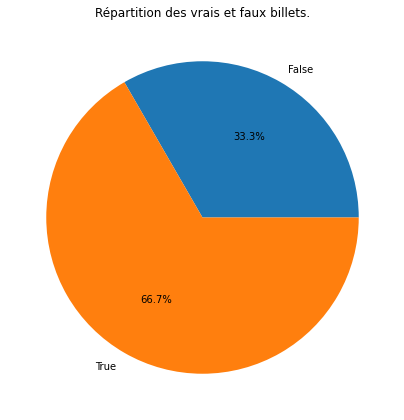

In [39]:
plt.figure(figsize= (7, 10))
plt.pie(billet.groupby(["is_genuine"])["diagonal"].count(), labels=["False","True"],autopct="%1.1f%%")
plt.title("Répartition des vrais et faux billets.")
plt.show()


In [40]:
# regard rapide sur la moyenne des caracteristiques des vrai et faux billet;
billet.groupby(["is_genuine"]).mean()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,171.90116,104.19034,104.14362,5.216290,3.35016,111.63064
True,171.98708,103.94913,103.80865,4.116122,3.05213,113.20243


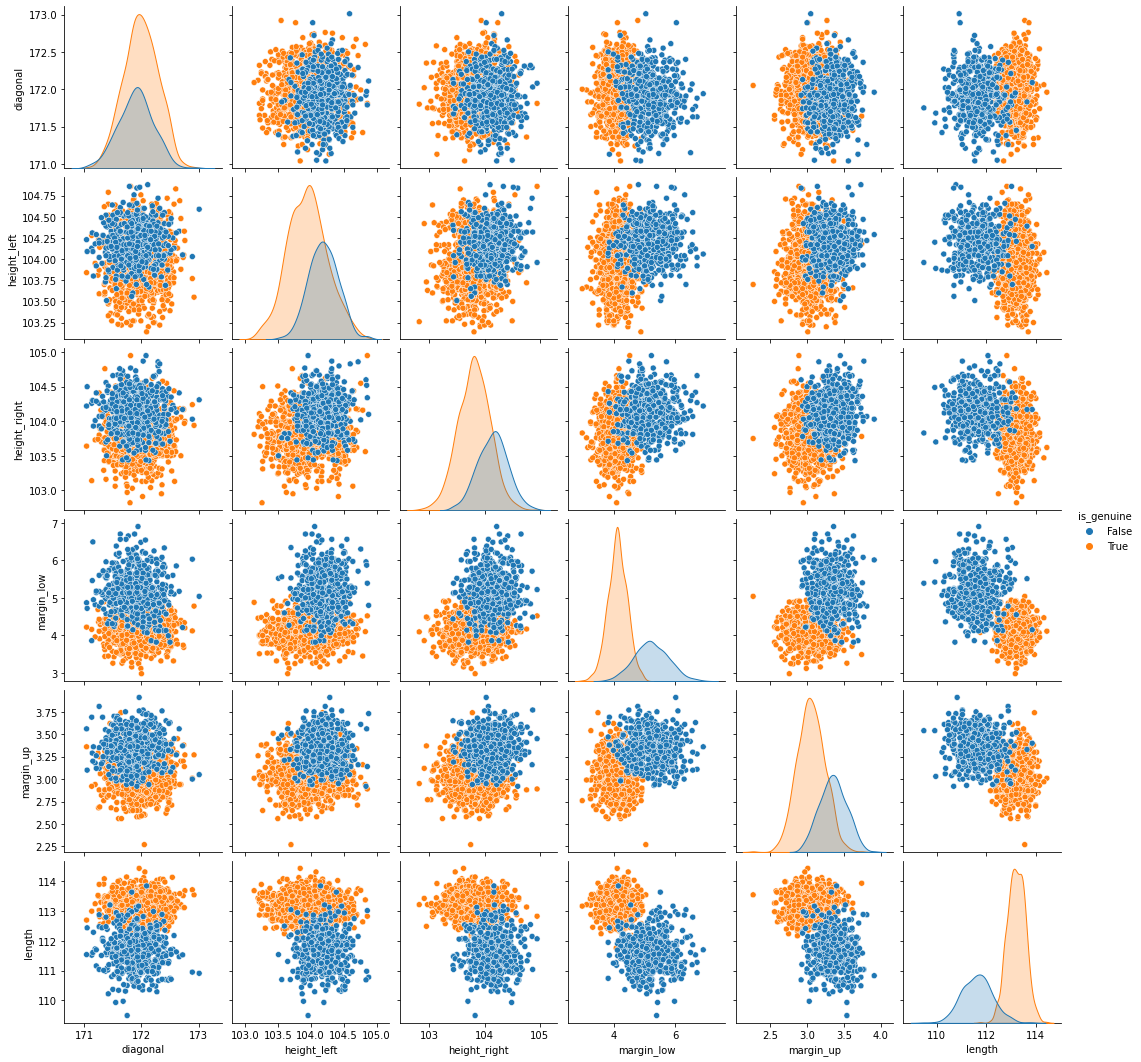

In [41]:
# Visualisation des correlations avec comme indicateur de couleur les vrai et faux billet;
sns.pairplot(billet, hue="is_genuine")
plt.show()

Nous voyons, ici que pour determiner les vrai et faux billet nous aurions pu utliser margin_low et length, car ce sont les deux variables qui present les clusters les plus distinct. 

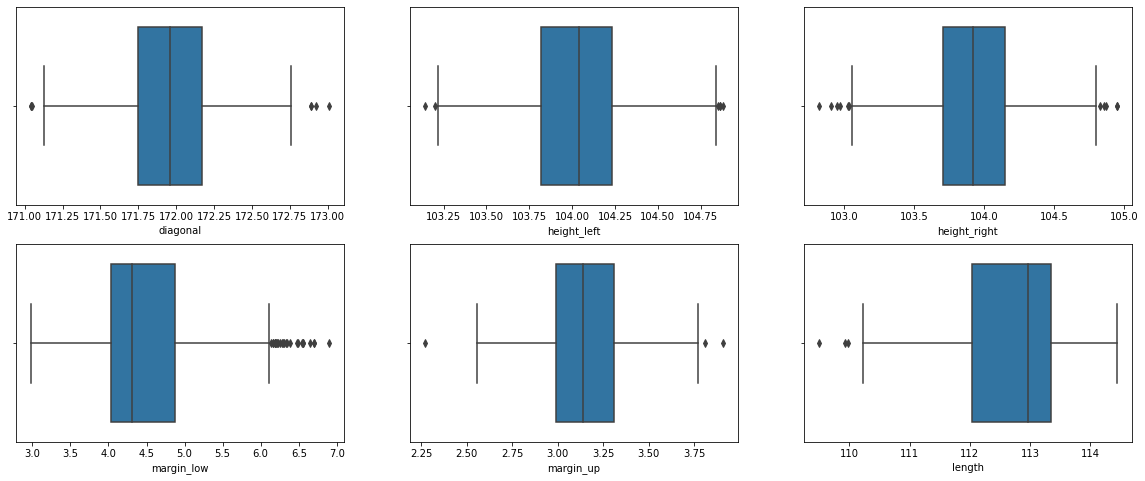

In [42]:
# Representation graphique des outliers:
a = 2  # nombre de lignes
b = 3  # nombre de colonnes
c = 1  # initialisation

fig = plt.figure(figsize=(20,8))

for i in billet.loc[:, billet.columns != "is_genuine"]:
    plt.subplot(a, b, c)
    #plt.title('{} (boxplot)'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(x = billet[i])
    c = c + 1
plt.show()

In [43]:
from outliers import outliers

outliers(billet.loc[:, billet.columns != "is_genuine"])

le nombre de valeurs abérantes est de:
 diagonal         7
height_left      6
height_right    11
margin_low      25
margin_up        3
length           3
dtype: int64
please choose show, count or delete or exit 


On voit qu'il y a effectivement, pour toutes les dimensions, des outliers que l'on va identifier mathématiquement pour plus de précision.

# Régression logistique pour déterminer les vrais et faux billet; 

In [44]:
# on définit x et y
y = billet["is_genuine"] # Target
X = billet.drop(["is_genuine"],axis=1) # Features
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
# creation du model;
model = LogisticRegression()
model.fit(x_train, y_train)
# prédictions; 
prediction = model.predict(x_test)

# Test du model;

Nous voyons ici le score de notre modèle de régression logistique, qui est de: 99.0 %


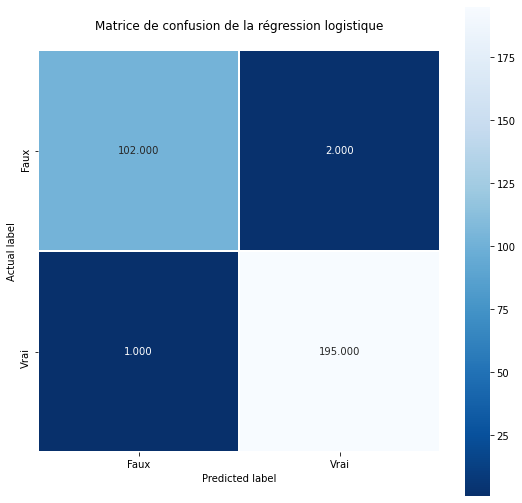

In [45]:
# test du model;
print("Nous voyons ici le score de notre modèle de régression logistique, qui est de:"
, accuracy_score(y_test, prediction) *100,"%")
cm = metrics.confusion_matrix(y_test, prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'
,xticklabels = ["Faux","Vrai"],yticklabels=["Faux","Vrai"])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Matrice de confusion de la régression logistique\n")
plt.show()

In [46]:
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
billet_T = billet
# Test Box-Tidwell:
var_cont = ["height_right","margin_low","margin_up","length"]

# Ajout de variables transofrmees (logarithme neprien):
for var in var_cont:
    billet_T[f'{var}:log_{var}'] = billet_T[var].apply(lambda x: x * np.log(x))

# On ne garde que les colonnes concernant les variables continues:
cols_to_keep = var_cont + billet_T.columns.tolist()[-len(var_cont):]

# Inclusion des ln dans les variables:
X_lt = billet_T[cols_to_keep]
X_lt = sm.add_constant(X_lt, prepend=False)
y_lt = billet_T["is_genuine"]

# Construction du modele:
logit_results = GLM(y_lt, X_lt).fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1491
Model Family:                Gaussian   Df Model:                            8
Link Function:               identity   Scale:                        0.035251
Method:                          IRLS   Log-Likelihood:                 385.05
Date:                Fri, 29 Apr 2022   Deviance:                       52.560
Time:                        10:17:48   Pearson chi2:                     52.6
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
height_right  

En principe, selon le test de Box-Tidewell, l'hypothèse nulle est que les variables agissent d'une maniere lineaire.

Pour log_margin_up et log_length, p-val de Z est inférieure à 0,05, ces variables sont donc significatives, l'hypothèse nulle de linéarité n'est donc pas vérifiée. Elles agissent de maniere non lineaire.

En revanche pour log_margin_low et log_height_right, la p-value de Z est supérieure à 0,05, ces variables sont donc non significatives, l'hypothèse nulle de linéarité n'est pas rejetée. Elles n'agissent pas de maniere non lineaire.

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))


              precision    recall  f1-score   support

       False       0.99      0.98      0.99       104
        True       0.99      0.99      0.99       196

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [48]:
# Test binarite:
print("Il y a donc bien",billet["is_genuine"].nunique(), 
"possibilitées pour notre varaible target,le test de binarité est bien concluant")

Il y a donc bien 2 possibilitées pour notre varaible target,le test de binarité est bien concluant


# Test sur le model test donnée par l'école;

In [49]:
prod_test_reg = prod_test
pred =model.predict(prod_test_reg)
proba = model.predict_proba(prod_test_reg)
prod_test_reg["prediction"] = pred
proba = proba[:,1]
prod_test_reg['proba'] = proba*100
prod_test_reg

,diagonal,height_left,height_right,margin_low,margin_up,length,prediction,proba
id,,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,False,0.515229
A_2,171.87,104.17,104.13,6.00,3.31,112.09,False,0.092098
A_3,172.00,104.58,104.29,4.99,3.39,111.57,False,0.126581
A_4,172.49,104.55,104.34,4.44,3.03,113.20,True,91.041491
A_5,171.65,103.63,103.56,3.77,3.16,113.33,True,99.961685


On obtient 3 faux pour 2 vrai

# Analyse des clusters par la méthodes des K-means et de l'ACP;

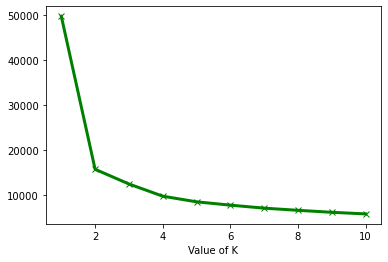

In [50]:
# Méthode Elbow 
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(billet) 
    cost.append(KM.inertia_)      
plt.plot(range(1, 11), cost, color ='g', linewidth ='3',marker="x") 
plt.xlabel("Value of K") 
plt.show() 

Ici, nous voyons que le nombres de k optimal serait 2;

# on normalise les données pour avoir une meilleur représentation

In [51]:
billet_norm = (billet - (billet.mean(axis=0)))/ (billet.std(axis=0))
billet_norm

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,height_right:log_height_right,margin_low:log_margin_low,margin_up:log_margin_up,length:log_length
72,0.706871,-0.060420,-0.465947,-1.444311,-0.633264,0.425026,0.127760,-1.444009,-0.635476,0.410339,0.127164
99,0.706871,-0.093186,0.135131,0.797518,-0.561986,-0.049494,0.460051,0.797417,-0.568308,-0.066439,0.459772
151,0.706871,0.365537,-0.766486,1.411717,-0.528628,-0.567152,0.288176,1.411993,-0.536764,-0.577736,0.287715
197,0.706871,-1.665951,-1.233992,-0.369461,-0.741437,2.021140,0.677758,-0.369701,-0.736791,2.067461,0.677768
241,0.706871,-0.420846,0.368884,0.428998,-0.518935,-0.567152,-0.364947,0.428772,-0.527586,-0.577736,-0.365737
...,...,...,...,...,...,...,...,...,...,...,...
1495,-1.413742,-0.682973,1.170322,0.766808,-0.095233,-0.265185,-1.602443,0.766694,-0.120752,-0.280617,-1.602267
1496,-1.413742,0.758728,2.005154,1.595977,1.192842,0.942685,-1.957651,1.596407,1.177959,0.938967,-1.956810
1497,-1.413742,-0.519143,-0.065228,0.613258,1.556534,0.899546,-0.834737,0.613085,1.559996,0.894583,-0.835407
1498,-1.413742,0.332771,0.836390,0.428998,1.041304,1.330928,-0.490988,0.428772,1.020674,1.341079,-0.491776


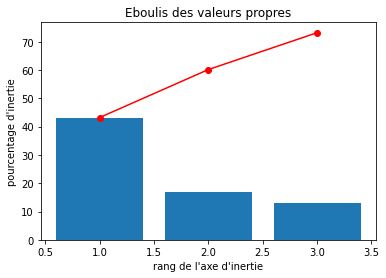

Ici nous voyons d'apres l'éboulis des valeurs qu'une projection sur F1 et F2 est suffisante car F1 représente plus de 80% du dataset


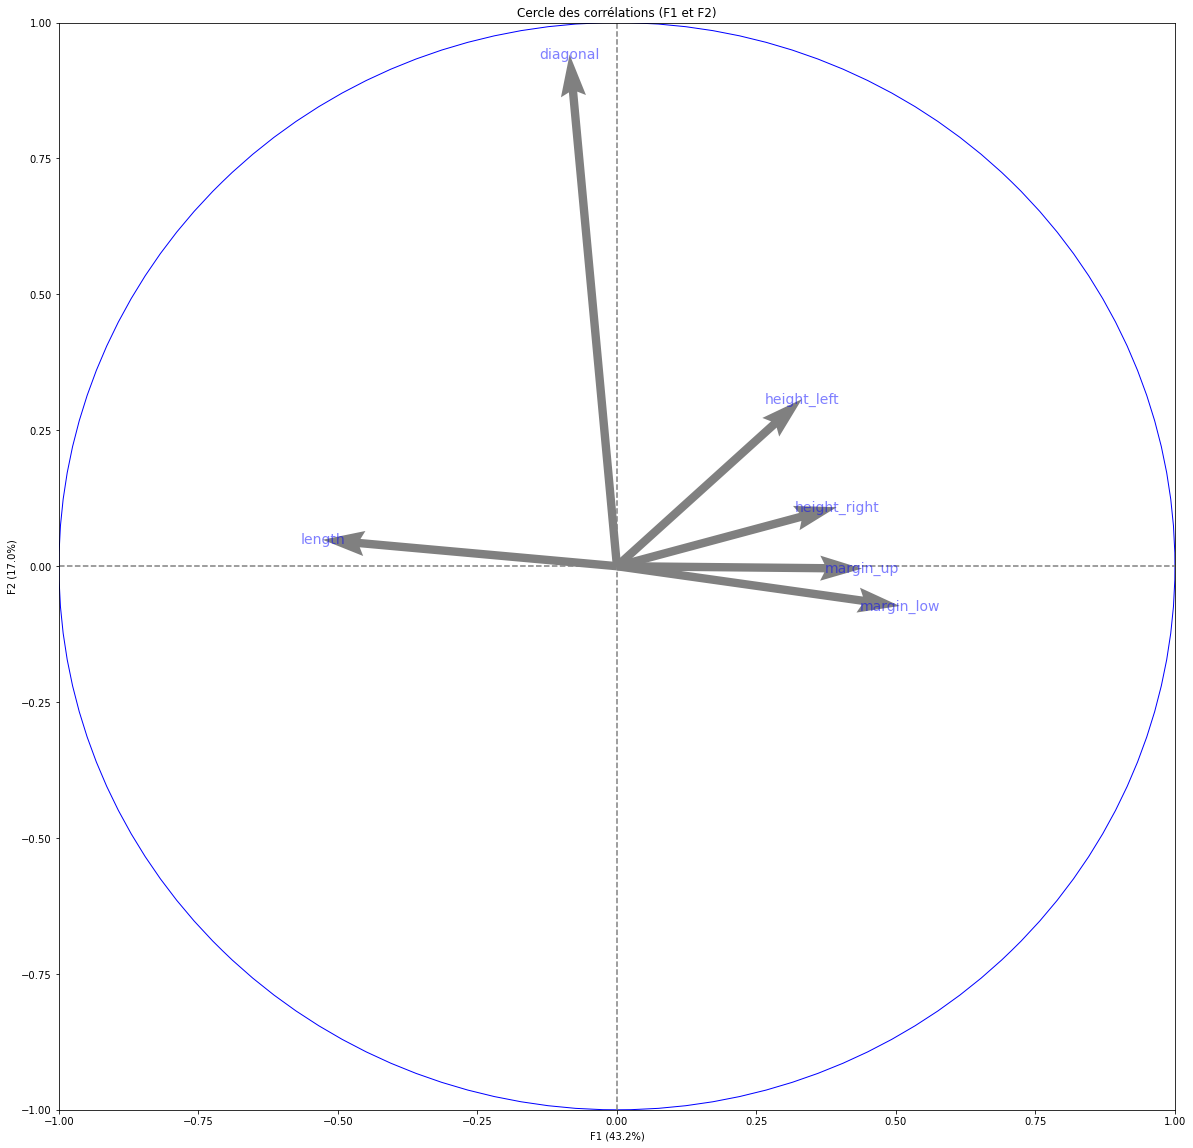

Nous pouvons observer sur le cercle de corrélation que lenght et margin_up est fortement corréleé a margin_low, de plus nous observons que plus ces variables sont repésenter sur l'axe F1


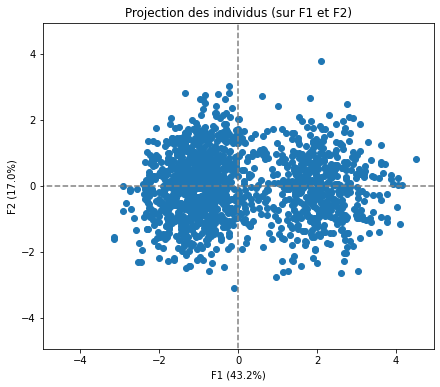

De ce fait nous pouvons affirmer avec la projection des individus, que nos deux groupes de points représente bien les vrais et faux billet et que leur lenght et margin_low sont très corréler dans la determination de l'authenticité des billets


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


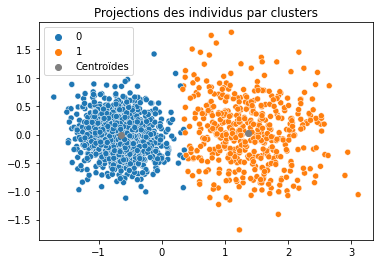

In [52]:
features = billet_norm.drop(["is_genuine"],axis=1).columns
# Calcul des composantes principales
pca = decomposition.PCA(n_components=3).fit(billet_norm[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
X_projected = PCA(n_components=3).fit_transform(billet_norm[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
X_projected = PCA(n_components=3).fit_transform(billet_norm[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
# Eboulis des valeurs propres
display_scree_plot(pca)
print("Ici nous voyons d'apres l'éboulis des valeurs qu'une projection sur F1 et F2 est suffisante car F1 représente plus de 80% du dataset")
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, 5, pca, [(0,1)], labels = np.array(features))
print("Nous pouvons observer sur le cercle de corrélation que lenght et margin_up est fortement corréleé a margin_low, de plus nous observons que plus ces variables sont repésenter sur l'axe F1")
display_factorial_planes(X_projected, 5, pca, [(0,1)])
plt.show()
print("De ce fait nous pouvons affirmer avec la projection des individus, que nos deux groupes de points représente bien les vrais et faux billet et que leur lenght et margin_low sont très corréler dans la determination de l'authenticité des billets")
# k-means;
pca = decomposition.PCA(n_components=3).fit(billet[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
X_projected = PCA(n_components=3).fit_transform(billet[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
X_projected = PCA(n_components=3).fit_transform(billet[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
kmeans = KMeans(n_clusters= 2)
x_kmeans = kmeans.fit_transform(billet[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
billet["Clusters"] = kmeans.labels_
centroids = kmeans.cluster_centers_
centroids_projected = pca.transform(centroids)
sns.scatterplot(X_projected[:, 0], X_projected[:, 1],hue = billet["Clusters"],edgecolors="#D3D3D3")
plt.scatter(centroids_projected[:,0],centroids_projected[:,1], color="grey",label="Centroïdes")
plt.legend()
plt.title("Projections des individus par clusters")
plt.show()


# Test et interpretation de nôtre clustering;

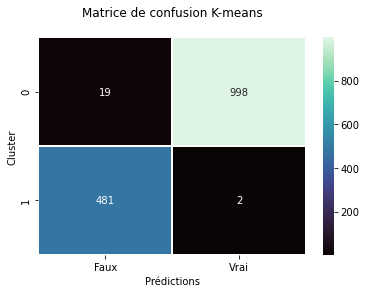

In [53]:
#Verrfication de la classification: Matrice de confusion:
km_matrix = pd.crosstab(billet["Clusters"],billet["is_genuine"])
# Graphique:
sns.heatmap(km_matrix,
            annot = True,
            fmt = ".3g", 
            cmap = sns.color_palette("mako", as_cmap=True),
            linecolor = "white",
            linewidths = 0.3,
            xticklabels = ["Faux","Vrai"],
            yticklabels=["0","1"]
            )
plt.xlabel("Prédictions")
plt.ylabel("Cluster")
plt.title("Matrice de confusion K-means\n")
plt.show()

In [54]:
# Predictions sur des donnees inconnues:
x_test_km = prod_test[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

prod_test["cluster_pred"] = kmeans.predict(x_test_km)
print(prod_test[["prediction","cluster_pred"]])

     prediction  cluster_pred
id                           
A_1       False             1
A_2       False             1
A_3       False             1
A_4        True             0
A_5        True             0


On obtient bien les mêmes résultat qu'avec la régression logistic, 3 faux et 2 vrai

In [55]:
from algo_faux_billets import detection

detection(x_test_km)

/Users/bessonecorentin/Desktop/openclassroom/P10_Bessone/algo_faux_billets.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["prediction"] = pred
/Users/bessonecorentin/Desktop/openclassroom/P10_Bessone/algo_faux_billets.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['proba'] = proba*100


,diagonal,height_left,height_right,margin_low,margin_up,length,prediction,proba
id,,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,False,0.513036
A_2,171.87,104.17,104.13,6.00,3.31,112.09,False,0.083430
A_3,172.00,104.58,104.29,4.99,3.39,111.57,False,0.102924
A_4,172.49,104.55,104.34,4.44,3.03,113.20,True,90.237957
A_5,171.65,103.63,103.56,3.77,3.16,113.33,True,99.960220


# Conclusion de l'analyse

Ici nous avons pu voir, que nos deux méthodes de prédiction:  

 -la régression logistique  
 -les kmeans

Nous ont données les mêmes prédictions. 

Nous pouvons néanmoins poser une intérogation sur le fait que le modéle étudier est scolaire est relativements propre. 
Comme observé sur les test pour notre régressions qui avait un très bon pourcentage. 

Néanmoins nos observation et prédictions se sont trouvé très précises. 
NOus pouvons donc conclure en affrimant que notre algorithme fonctionne et peut prédire à partir de variable quantitative le fait qu'un billet soit vrai ou faux. 

Nous pourrons maintenant utliser nôtre algorithme sur n'importe dataset de billet dès lors qu'il sera nettoyer et au bon format de nôtre algorithme.

In [56]:
test = pd.read_csv("billets_test_eval.csv")
test = test.set_index("id")
detection(test)

,diagonal,height_left,height_right,margin_low,margin_up,length,prediction,proba
id,,,,,,,,
B_1,172.09,103.95,103.73,4.39,3.09,113.19,True,98.884508
B_2,171.52,104.17,104.03,5.27,3.16,111.82,False,0.830168
B_3,171.78,103.80,103.75,3.81,3.24,113.39,True,99.908995
B_4,172.02,104.08,103.99,5.57,3.30,111.10,False,0.016407
B_5,171.79,104.34,104.37,5.00,3.07,111.87,False,1.303829
